In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
#Função para treinar o Perceptron
def perceptron_fit(X, y, max_epochs=100):
   # Inicializar o vetor de pesos (inclui bias como o último elemento)
   w = np.zeros(X.shape[1] + 1)

   #Iterar por epoches
   for epoch in range(max_epochs):
       errors = 0
       for i in range(X.shape[0]):
           x_i = np.append(X[i], 1)  #Adiciona o bias ao vetor de entrada
           y_pred = np.sign(np.dot(w, x_i))  # Previsão
           if y_pred == 0:  # a previsão não seja 0
               y_pred = -1
           if y_pred != y[i]:
               w += y[i] * x_i
               errors += 1
       if errors == 0:  #Para se não houver erro
           break
   return w

In [3]:
#Função para realizar a predição com o Perceptron
def perceptron_predict(X, w):
   predictions = []
   for i in range(X.shape[0]):
       x_i = np.append(X[i], 1)  # Adiciona o bias ao vetor de entrada
       y_pred = np.sign(np.dot(w, x_i))
       predictions.append(y_pred if y_pred != 0 else -1)
   return np.array(predictions)

#Função para validação cruzada
def perceptron_cross_validate(X, y, k=10, max_epochs=100):
   skf = StratifiedKFold(n_splits=k)
   accuracies = []
   for train_index, test_index in skf.split(X, y):
       X_train, X_test = X[train_index], X[test_index]
       y_train, y_test = y[train_index], y[test_index]

       w = perceptron_fit(X_train, y_train, max_epochs)

       y_pred = perceptron_predict(X_test, w)

       # Calcula a acurácia
       acc = accuracy_score(y_test, y_pred)
       accuracies.append(acc)
   return np.mean(accuracies)

Gerar um conjunto de dados de exemplo (exemplo semelhante ao iris no R)

In [4]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)
y = np.where(y == 0, -1, 1)  # Ajustar as classes para serem -1 e 1

# Validação cruzada
accuracy = perceptron_cross_validate(X, y, k=10)
print(f"Acurácia média: {accuracy:.2f}")

Acurácia média: 0.99


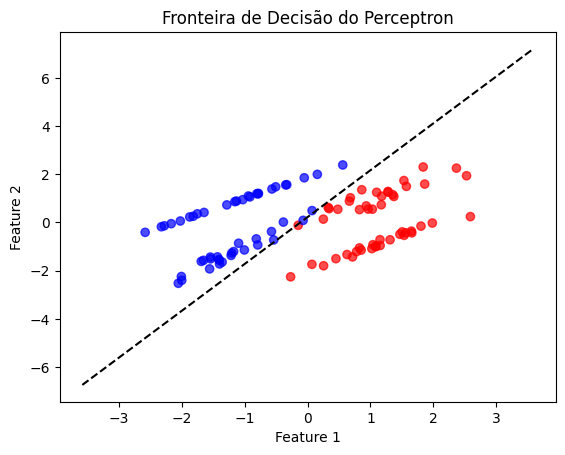

In [5]:
#Visualização da fronteira de decisão
def plot_decision_boundary(X, y, w):
   plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)

   #Gera linha de decisão
   x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   y_min, y_max = -(w[0] * x_min + w[2]) / w[1], -(w[0] * x_max + w[2]) / w[1]
   plt.plot([x_min, x_max], [y_min, y_max], 'k--')
   plt.xlabel("Feature 1")
   plt.ylabel("Feature 2")
   plt.title("Fronteira de Decisão do Perceptron")
   plt.show()

#treinar modelo e plotar fronteira
w = perceptron_fit(X, y)
plot_decision_boundary(X, y, w)
